# Typical use cases in high energy physics

In [16]:
# Imports
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Plot settings
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 1. Data model and goals

We consider 1 millions of "observations", each defined by ten 3D vectors $(r_0,...,r_9)$ where $r_i=(x,y,z)$. These pseudo data can represent position in space or RGB colors. This is just an example to play with and apply numpy concepts for both simple computations (element-by-element functions, statistics calculations) and more complex calculations exploiting the multi-dimensional structure of the data. For example, one might want to compute the distance between all pairs $(r_i, r_j)$, which has to be done without loop.

## 2. Generation of pseudo-data

Using the `np.random` module, it is possible to generate n-dimensional arrays easily. In our case, the array containing our observation will have 3 dimensions (or **axis** in `numpy` language), and the size along each of these axis will have the following size and meaning:
  + `axis=0`: over 1.5 events
  + `axis=1`: over 10 vectors
  + `axis=2`: over 3 coordinates

In [2]:
r = np.random.random_sample((1000000, 10, 3))
print(r[0:2, ...])

[[[0.34436731 0.53107072 0.26815523]
  [0.91108107 0.4570885  0.00702956]
  [0.32093231 0.24713113 0.83575452]
  [0.47213206 0.19990225 0.38265613]
  [0.76153726 0.04433562 0.22878573]
  [0.10192781 0.78294055 0.31604284]
  [0.52889256 0.52907432 0.94869321]
  [0.30725522 0.52849071 0.12516978]
  [0.21245529 0.24189646 0.6371295 ]
  [0.56123822 0.04453289 0.74059217]]

 [[0.05499102 0.03072383 0.61919756]
  [0.15099051 0.37395727 0.4230077 ]
  [0.97925116 0.82085132 0.90825113]
  [0.33902785 0.80294261 0.10205408]
  [0.57943954 0.61033554 0.171087  ]
  [0.56197849 0.71818245 0.59397004]
  [0.47305503 0.88798201 0.12895532]
  [0.16396314 0.0010218  0.25188666]
  [0.13043163 0.17845942 0.72213101]
  [0.10597685 0.66827465 0.8475888 ]]]


## 3. Mean over the differents axis

### 3.1 Mean over `axis=0`

This mean will average all observations over the first dimension, returning an array of dimension `(10, 3)` corresponding to the average $r_{i}=(x_i,y_i,z_i)$ over the 1 millions observations. The histogram distribution results into three separate histograms (one for each $x,y,x$) each having 10 entries (one per $r_i$)

36.4 ms ± 10.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(10, 3)


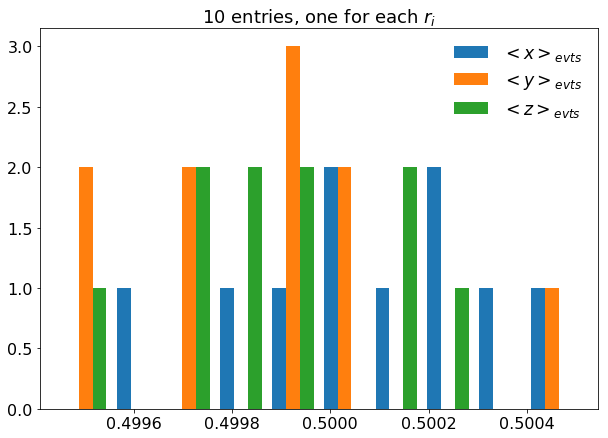

In [17]:
%timeit np.mean(r, axis=0)
m0 = np.mean(r, axis=0)
print(m0.shape)
ax = plt.hist(m0, label=['$<x>_{evts}$', '$<y>_{evts}$', '$<z>_{evts}$'])
ax = plt.title('10 entries, one for each $r_i$')
ax = plt.legend()

### 3.2 Mean over `axis=1`

This one will compute the average over the 10 vectors, for each of 1 million observations, reducing into a `(1000000, 3)` shape array, as seen below.

275 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000000, 3)


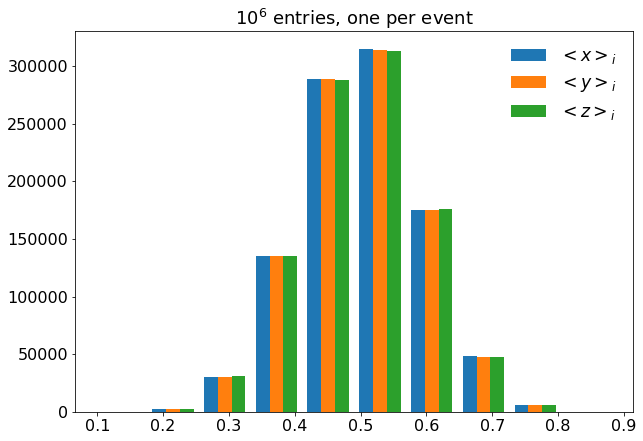

In [18]:
%timeit np.mean(r, axis=1)
m1 = np.mean(r, axis=1)
print(m1.shape)
ax = plt.hist(m1, label=['$<x>_{i}$', '$<y>_{i}$', '$<z>_{i}$'])
ax = plt.title('$10^6$ entries, one per event')
ax = plt.legend()

### 3.2 Mean over `axis=2`

This directly computes the average over the three coordinates for each vector of each event, in other words, the barycenter $(x+y+z)/3$.

241 ms ± 45.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000000, 10)


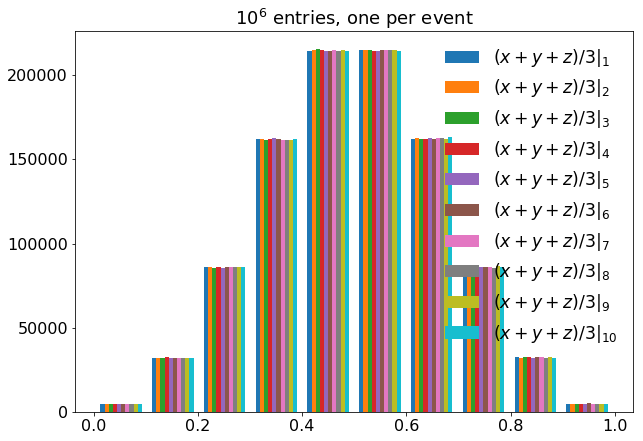

In [19]:
%timeit np.mean(r, axis=2)
m2 = np.mean(r, axis=2)
print(m2.shape)
ax = plt.hist(m2, label=['$(x+y+z)/3|_{'+'{}'.format(i)+'}$' for i in range(1, 11)])
ax = plt.title('$10^6$ entries, one per event')
ax = plt.legend()

## 4. Distance computation

### 4.1 Distance to a reference $r_0$

475 ms ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000000, 10)


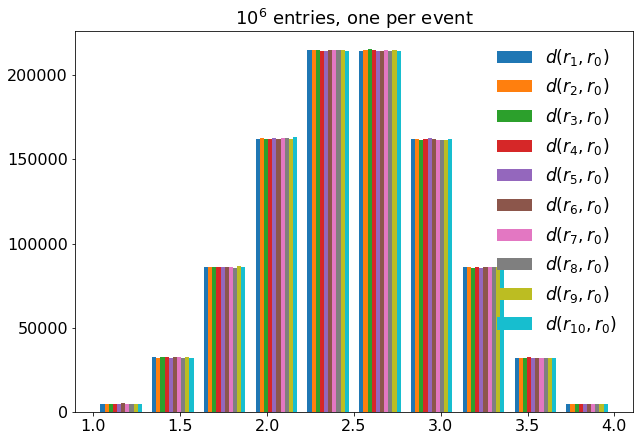

In [20]:
# Reference definition 
r0 = np.array([1, 2, 1])

# Compute all 10 differences for all the events
%timeit np.sum(((r-r0)**2)**0.5, axis=2)
d = np.sum(((r-r0)**2)**0.5, axis=2)
print(d.shape)
ax = plt.hist(d, label=['$d(r_{'+'{}'.format(i)+'},r_0)$' for i in range(1, 11)])
ax = plt.title('$10^6$ entries, one per event')
ax = plt.legend()

### 4.2 Distance between the two first vectors $r_0$ and $r_1$ for each event

64.8 ms ± 9.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000000,)


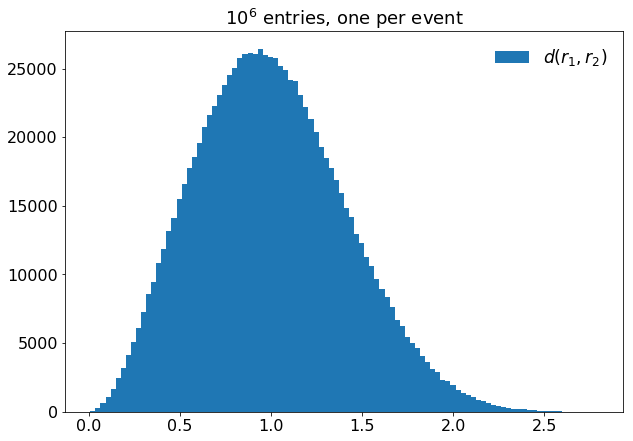

In [21]:
# Condensed expression
%timeit np.sum(((r[:, 0, :]-r[:, 1, :])**2)**0.5, axis=1)

# More readable expression
r1, r2 = r[:, 0, :], r[:, 1, :]
d12 = np.sum(((r1-r2)**2)**0.5, axis=1)
print(d12.shape)

# Plotting
ax = plt.hist(d12, label='$d(r_1,r_2)$', bins=100)
ax = plt.title('$10^6$ entries, one per event')
ax = plt.legend()

## 5. Pairing 3D vectors for each observation, without a loop

### 5.1 Finding all possible $(r_{i}, r_{j})$ pairs for all events

In [45]:
def combs_nd(a, n, axis=0, info=False):
    '''
    Solution found on https://stackoverflow.com/questions/16003217/n-d-version-of-itertools-combinations-in-numpy
    
    The idea here is to simply work on indices to build the pairs 
    since it doesn't really matter what are the nature of the objects ...
    '''

    # 1. Initialisation of indices array along the axis we want to pair
    indices = np.arange(a.shape[axis])
    if info:
        print('initialisation -> indices={}'.format(indices))
        
    # 2. Datatype of index array ([int,int] for a pair)
    dt = np.dtype([('', np.intp)]*n)
    if info:
        print('datatype: {}'.format(dt))
    
    # 3. Use itertool to compute combinations and overwite indices
    indices = np.fromiter(itertools.combinations(indices, n), dt) # [(0,1), (0,2), .. ]
    if info:
        print('np.fromiter -> indicies={}'.format(indices))
    indices = indices.view(np.intp) # [0 1 0 2 ...]
    if info:
        print('indices.view -> indicies={}'.format(indices))
    indices = indices.reshape(-1, n) # [[0 1], [0 2], ...]
    if info:
        print('indices.reshape -> indicies={}'.format(indices))
        
    # 4. Take all elements in a defined by indices along a given axis
    # the dimension of the array is changed because indices has (n,2) shape
    return np.take(a, indices, axis=axis)


# Trying on the 2 first observations considering only the 5 first vectors ri: r[0:1, 0:5]
result = combs_nd(a=r[0:1,0:5], n=2, axis=1, info=True)

initialisation -> indices=[0 1 2 3 4]
datatype: [('f0', '<i8'), ('f1', '<i8')]
np.fromiter -> indicies=[(0, 1) (0, 2) (0, 3) (0, 4) (1, 2) (1, 3) (1, 4) (2, 3) (2, 4) (3, 4)]
indices.view -> indicies=[0 1 0 2 0 3 0 4 1 2 1 3 1 4 2 3 2 4 3 4]
indices.reshape -> indicies=[[0 1]
 [0 2]
 [0 3]
 [0 4]
 [1 2]
 [1 3]
 [1 4]
 [2 3]
 [2 4]
 [3 4]]


### 5.2 Computing (minimum) distances on these pairs

In [46]:
# Time and get the pair function
print('\nGetting all pairs')
%timeit combs_nd(r, 2, axis=1)
pairs = combs_nd(r, 2, axis=1)
print(pairs.shape)

# Time and Get the euclidien distance of all pair
print('\nGetting all euclidian distances')
dp = pairs[:, :, 0, :]-pairs[:, :, 1, :]
%timeit(np.sum(dp**2, axis=2))**0.5
diff_pairs = (np.sum(dp**2, axis=2))**0.5
print(dp.shape)
print(diff_pairs.shape)

# Time and get the minimum
print('\nGetting the minimum distances')
%timeit np.min(diff_pairs, axis=1)
closest_pair = np.min(diff_pairs, axis=1)
print(closest_pair.shape)


Getting all pairs
936 ms ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000000, 45, 2, 3)

Getting all euclidian distances
1.14 s ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
(1000000, 45, 3)
(1000000, 45)

Getting the minimum distances
87.1 ms ± 8.68 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
(1000000,)


In [47]:
def compute_dr_min(a):
    pairs = combs_nd(a, 2, axis=1)
    
    # Get the axis of the pair index to build p1, p2 = a[...,0], a[...,1]
    d = pairs.ndim
    i1 = tuple([None if i != d-2 else 0 for i in range(0, d)])
    i2 = tuple([None if i != d-2 else 1 for i in range(0, d)])
    
    return np.min(np.sum((pairs[i1]-pairs[i2])**2, axis=2)**0.5, axis=1)


# Time and get the minimum from r directly
print('\nGetting the minimum distances from r directly using one function')
%timeit compute_dr_min(r)


Getting the minimum distances from r directly using one function
1.09 s ± 188 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


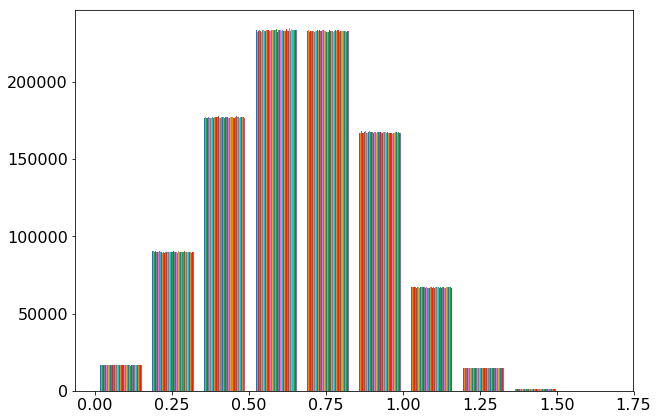

In [48]:
ax = plt.hist(diff_pairs)

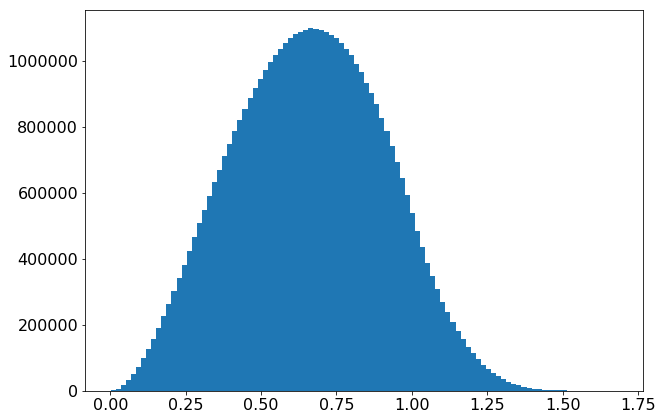

In [49]:
ax = plt.hist(diff_pairs.flatten(), bins=100)

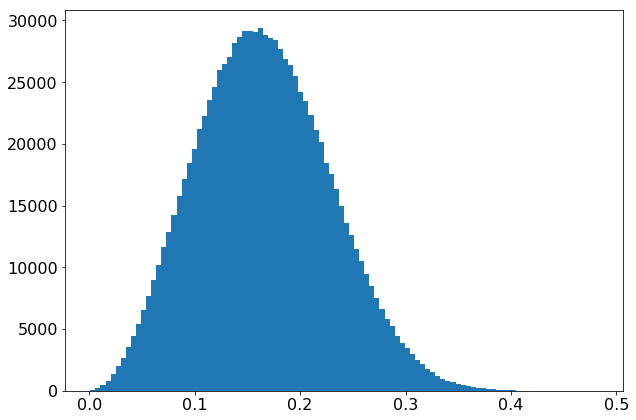

In [50]:
ax = plt.hist(closest_pair, bins=100)

## 6. Selecting a subset of $r_i$ based on $(x,y,z)$ values, without loop

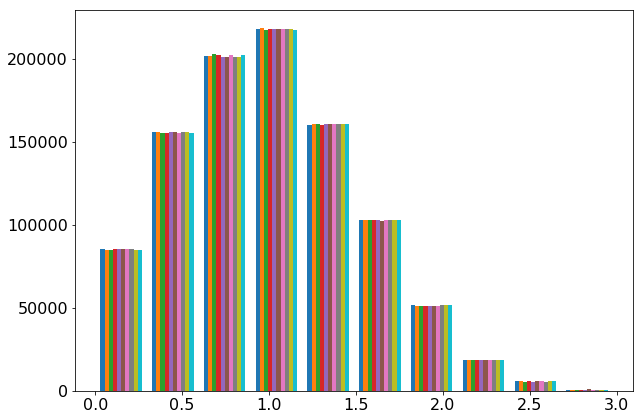

In [51]:
x, y, z = r[:, :, 0], r[:, :, 1], r[:, :, 2]
ax = plt.hist(x**2+y**2+z**2, bins=10)

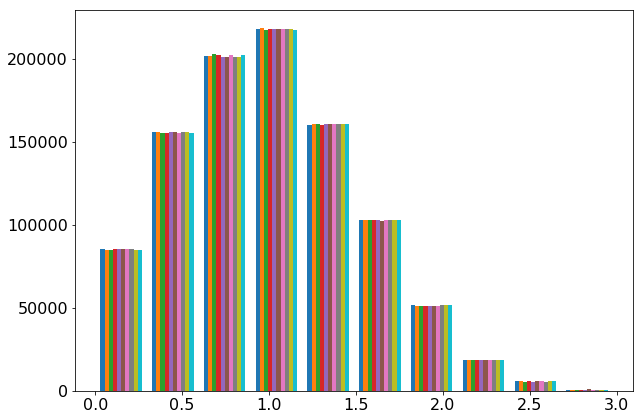

In [52]:
ax = plt.hist(np.sum(r**2, axis=2), bins=10)

### 6.1 Counting number of points amont the 10 with $x_i>y_i$ in each event

(1000000, 10)


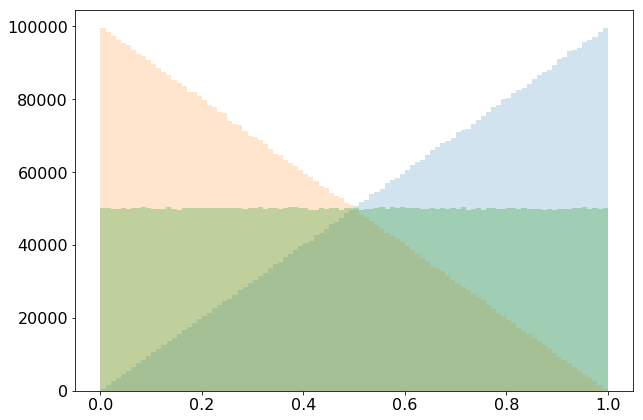

In [53]:
# define the selection
idx = x > y
print(idx.shape)

# Checkout the distribution of x,y,z for the selected points
ax = plt.hist(x[idx], bins=100, alpha=0.2)
ax = plt.hist(y[idx], bins=100, alpha=0.2)
ax = plt.hist(z[idx], bins=100, alpha=0.3)

(1000000,)


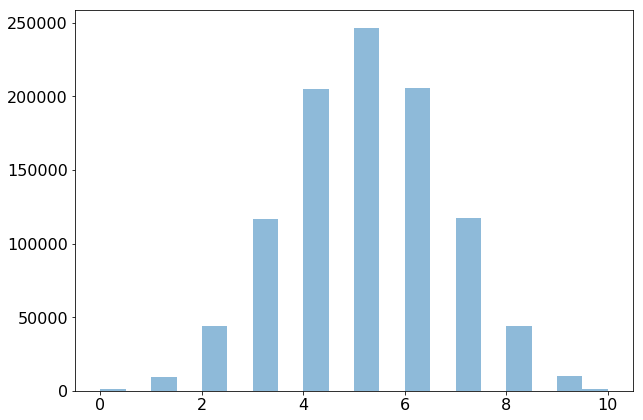

In [54]:
# Count the number of r per event satisfying x>y
c = np.count_nonzero(idx, axis=1)
print(c.shape)

# Plot the distribution of the count
ax = plt.hist(c, bins=20, alpha=0.5)

### 6.2 Plotting $z$ for the two types of population  ($x>y$ and $x<y$)


 -> Full array shape    = (500, 10)
 -> Indexed array shape = (2593,)
 -> Counting *all* selected pairs: 2593


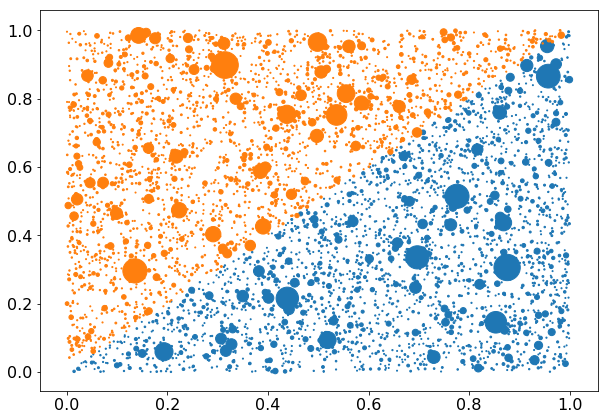

In [23]:
# Access xi and yi which satisfy xi>yi and xi<xi for each events (over 500 events)
# using proper indexing
sx, sy, sz = x[0:500, ...], y[0:500, ...], z[0:500, ...]
sidx_gt, sidx_lt = sx > sy, sx < sy

# Taking the proper indexing will flatten the array
print('\n -> Full array shape    = {}'.format(sx.shape))
print(' -> Indexed array shape = {}'.format(sx[sidx_gt].shape))
print(' -> Counting *all* selected pairs: {}'.format(np.count_nonzero(sidx_gt)))

# Plotting x vs z for the two populations (marker size is 1/(z+0.001))
ax = plt.scatter(sx[sidx_gt], sy[sidx_gt], s=(sz[sidx_gt]+1e-3)**-1)
ax = plt.scatter(sx[sidx_lt], sy[sidx_lt], s=(sz[sidx_lt]+1e-3)**-1)

### 6.3 Compute $x_i+y_i+z_i$ sum over  the collection of 10 $r_i$ including only points that have $x_i>y_i$ ?

(1000000,)
(1000000, 10) (1000000, 10) (1000000,)


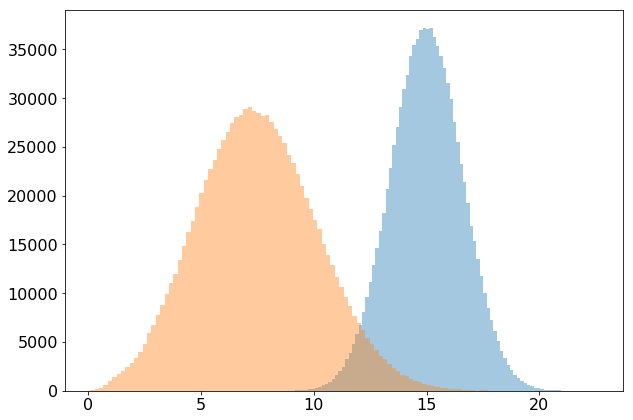

In [42]:
# First step: basic sum over 10 points, ie sum_{i=1..10}(xi+yi+zi) for each event.
ht1 = np.sum(x+y+z, axis=1)
print(ht1.shape)
ax = plt.hist(ht1, bins=100, alpha=0.4)

# Second step: doing the proper sum, ie only with points verifying x>y.
# 'x*selection' replace xi by 0 in [x0,...,x9]_evt where x<y for all 
# events evt. They must have the same shape to be multiplied element 
# by element.
selection = x>y 
ht2 = np.sum((x+y+z)*selection, axis=1) 
print(x.shape, selection.shape, ht2.shape)
ax = plt.hist(ht2[ht2 > 0], bins=100, alpha=0.4)

### 6.4 Pairing with a subset of $r_i$ verifying $x_i>y_i$ only

In [55]:
# define index of selected points
selection = x > y

# add an empty dimension to make broadcasting possible
selected_r = r*selection[:, :, None]

# replace all 0 (False) by nan so that any combinaison with one of those 
# will be nan - and be filtered
selected_r[selected_r == 0] = np.nan

# Print the two first events
print(selected_r[:2])

[[[       nan        nan        nan]
  [0.91108107 0.4570885  0.00702956]
  [0.32093231 0.24713113 0.83575452]
  [0.47213206 0.19990225 0.38265613]
  [0.76153726 0.04433562 0.22878573]
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  [0.56123822 0.04453289 0.74059217]]

 [[0.05499102 0.03072383 0.61919756]
  [       nan        nan        nan]
  [0.97925116 0.82085132 0.90825113]
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  [       nan        nan        nan]
  [0.16396314 0.0010218  0.25188666]
  [       nan        nan        nan]
  [       nan        nan        nan]]]


In [56]:
pairs = combs_nd(selected_r, n=2, axis=1)  # get all the possible pairs
print(pairs.shape)

(1000000, 45, 2, 3)


In [57]:
# get the first and second element of the pair
p1, p2 = pairs[:, :, 0, :], pairs[:, :, 1, :]

# compute the distance (summed over x,y,z, is axis=2)
dp = np.sum((p1-p2)**2, axis=2)**0.5

# set a default value of irrelevant pairs
dp[np.isnan(dp)] = 999
print(dp.shape)

(1000000, 45)


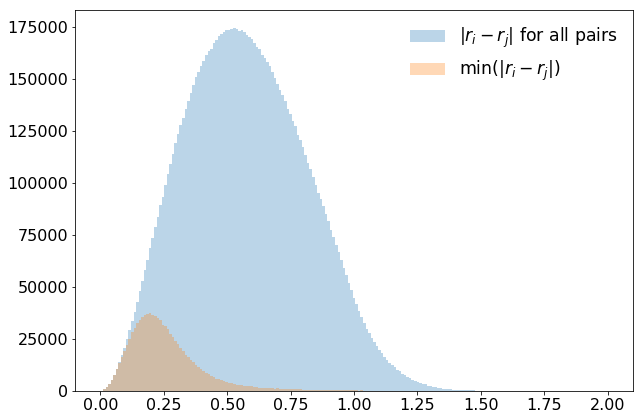

In [58]:
ax = plt.hist(dp.flatten(), bins=np.linspace(0, 2, 200), alpha=0.3, label='$|r_i-r_j|$ for all pairs')
ax = plt.hist(np.min(dp, axis=1), bins=np.linspace(0, 2, 200), alpha=0.3, label='min$(|r_i-r_j|)$')
ax = plt.legend()

## 7. Play with two collections of vectors with different size $\{r_i\}_{10}$ and $\{q_i\}_6$

In [47]:
q = np.random.random_sample((1000000, 6, 3))
print(q[0:2])

[[[0.18273329 0.88919754 0.94533167]
  [0.14130847 0.60501287 0.76631964]
  [0.01727239 0.31589769 0.77674801]
  [0.43584386 0.03698427 0.65843665]
  [0.65640608 0.82857438 0.36795615]
  [0.53113251 0.10629633 0.24452858]]

 [[0.6427692  0.17845751 0.12196744]
  [0.23347984 0.48754658 0.96964187]
  [0.75710888 0.999534   0.2420504 ]
  [0.44541921 0.45561578 0.80811487]
  [0.95508582 0.34944633 0.84320844]
  [0.34801462 0.32696285 0.51270624]]]


In [48]:
def all_pairs_nd(a, b, axis=0):

    # Sanity check
    good_shape = np.array_equal(
        np.delete(a.shape, axis), np.delete(b.shape, axis))
    if not good_shape:
        err = 'The shape along all dimensions but the one of axis={}'.format(
            axis)
        err += ' should be equal, while here:\n'
        err += '  -> shape of a is {} \n'.format(a.shape)
        err += '  -> shape of b is {} \n'.format(b.shape)
        raise NameError(err)

    # Individual indices
    a, b = np.asarray(a), np.asarray(b)
    ia, jb = np.arange(a.shape[axis]), np.arange(b.shape[axis])

    # Pairs of indicies
    dt = np.dtype([('', np.intp)]*2)
    if np.array_equal(a, b):
        ij = np.fromiter(itertools.combinations(ia, 2), dtype=dt)
    else:
        ij = np.fromiter(itertools.product(ia, jb), dtype=dt)
    ij = ij.view(np.intp).reshape(-1, 2)

    # Array of all pairs
    ipair, jpair = ij[:, 0], ij[:, 1]
    return np.stack([a.take(ipair, axis=axis), b.take(jpair, axis=axis)], axis=axis+1)

In [49]:
p = all_pairs_nd(r, q, axis=1)
print(p.shape)

(1000000, 60, 2, 3)


In [50]:
pairs = all_pairs_nd(r, r, axis=1)
print(pairs.shape)

(1000000, 45, 2, 3)


In [51]:
# Case where it will crash
p = all_pairs_nd(r, q, axis=2)

NameError: The shape along all dimensions but the one of axis=2 should be equal, while here:
  -> shape of a is (1000000, 10, 3) 
  -> shape of b is (1000000, 6, 3) 


## Appendix: explanation of the function `all_pairs_nd(a,b,axis)`

In [11]:
axis = 1

a = np.array([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]]
])

b = np.array([
    [[9, 10], [11, 12], [13, 14]],
    [[15, 16], [17, 18], [19, 20]]
])

In [12]:
a

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [13]:
b

array([[[ 9, 10],
        [11, 12],
        [13, 14]],

       [[15, 16],
        [17, 18],
        [19, 20]]])

In [14]:
# Get the indices of all pairs
ia, jb = np.arange(a.shape[axis]), np.arange(b.shape[axis])
dt = np.dtype([('', np.intp)]*2)
ij = np.fromiter(itertools.product(ia, jb), dtype=dt)
print(ij)
ij = ij.view(np.intp)
print(ij)
ij = ij.reshape(-1, 2)
print(ij)

[(0, 0) (0, 1) (0, 2) (1, 0) (1, 1) (1, 2)]
[0 0 0 1 0 2 1 0 1 1 1 2]
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]]


In [56]:
ipair = ij[:, 0]  # fisrt element of ij is the index of a
pairs_a = np.take(a, ipair, axis=1)
pairs_a

array([[[1, 2],
        [1, 2],
        [1, 2],
        [3, 4],
        [3, 4],
        [3, 4]],

       [[5, 6],
        [5, 6],
        [5, 6],
        [7, 8],
        [7, 8],
        [7, 8]]])

In [57]:
jpair = ij[:, 1]  # second element of ij is the index of b
pairs_b = np.take(b, jpair, axis=1)
pairs_b

array([[[ 9, 10],
        [11, 12],
        [13, 14],
        [ 9, 10],
        [11, 12],
        [13, 14]],

       [[15, 16],
        [17, 18],
        [19, 20],
        [15, 16],
        [17, 18],
        [19, 20]]])

In [58]:
pairs = np.stack([pairs_a, pairs_b], axis=2)
print(pairs.shape)
pairs

(2, 6, 2, 2)


array([[[[ 1,  2],
         [ 9, 10]],

        [[ 1,  2],
         [11, 12]],

        [[ 1,  2],
         [13, 14]],

        [[ 3,  4],
         [ 9, 10]],

        [[ 3,  4],
         [11, 12]],

        [[ 3,  4],
         [13, 14]]],


       [[[ 5,  6],
         [15, 16]],

        [[ 5,  6],
         [17, 18]],

        [[ 5,  6],
         [19, 20]],

        [[ 7,  8],
         [15, 16]],

        [[ 7,  8],
         [17, 18]],

        [[ 7,  8],
         [19, 20]]]])